# Exploring Dandiset 001174: Calcium imaging in SMA and M1 of macaques

**Important note:**  
This notebook was *AI-generated* and has not been fully verified by a human expert. Care should be taken when interpreting the code, outputs, or any results and conclusions. Please use caution and refer to the primary Dandiset documentation and/or manuscript for definitive information.

---

## Overview

This notebook demonstrates how to explore and analyze data from [Dandiset 001174, version 0.250331.2218](https://dandiarchive.org/dandiset/001174/0.250331.2218):  
**"Calcium imaging in SMA and M1 of macaques"**

**Citation:**  
Galvan, Adriana; Martel, Anne-Caroline; Pittard, Damien; Devergnas, Annaelle; Risk, Benjamin; Nassi, Jonathan J.; Yu, Waylin; Downer, Joshua D.; Wichmann, Thomas (2025) Calcium imaging in SMA and M1 of macaques (Version 0.250331.2218) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001174/0.250331.2218

**Keywords:**  
One-photon calcium imaging, non-human primates, microendoscope, reaching task, neuronal coactivation, calcium sensors, GCaMP, GRIN lens

**Description:**  
The study of motor cortices in non-human primates is relevant to our understanding of human motor control, both in healthy conditions and in movement disorders. Calcium imaging and miniature microscopes allow the study of multiple genetically identified neurons with excellent spatial resolution. We used this method to examine activity patterns of projection neurons in deep layers of the supplementary motor (SMA) and primary motor areas (M1) in four rhesus macaques. We implanted gradient index lenses and expressed GCaMP6f to image calcium transients while the animals were at rest or engaged in an arm reaching task. We tracked the activity of SMA and M1 neurons across conditions, examined cell pairs for synchronous activity, and assessed whether SMA and M1 neuronal activation followed specific sequential activation patterns.

---

## What this notebook covers

- Overview of this Dandiset and its assets (NWB files)
- Loading a remote NWB file using PyNWB, h5py, and remfile
- Exploring NWB file metadata and structure
- Visualizing imaging data and cell masks
- Plotting fluorescence traces for selected ROIs (cells)
- Providing links to interactive tools for further exploration

**Note:**  
Because NWB files can be large and are streamed over the network, code examples in this notebook operate on small slices of the data for demonstration. For analyses requiring the entire dataset, you may need to download files for local access.

## Required packages

The following packages are required (but are assumed to be already installed):
- numpy
- matplotlib
- pandas
- pynwb
- h5py
- remfile
- seaborn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pynwb
import h5py
import remfile
import seaborn as sns

sns.set_theme()

## Load Dandiset assets and overview

The Dandiset contains multiple NWB files. Here we show how assets can be obtained using the DANDI Python API (for illustration), but in this notebook we use one specific NWB file for the rest of the analysis due to performance reasons.

In [2]:
from dandi.dandiapi import DandiAPIClient

client = DandiAPIClient()
dandiset = client.get_dandiset("001174", "0.250331.2218")

# Print Dandiset metadata
metadata = dandiset.get_raw_metadata()
print("Dandiset name:", metadata.get("name", "[unknown]"))
print("Dandiset URL:", metadata.get("url", "https://dandiarchive.org/dandiset/001174/0.250331.2218"))

# List the first 5 NWB files
from itertools import islice
assets = dandiset.get_assets()
print("\nFirst 5 NWB file assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")
print("(More assets may be available in this Dandiset...)")

Dandiset name: Calcium imaging in SMA and M1 of macaques
Dandiset URL: https://dandiarchive.org/dandiset/001174/0.250331.2218

First 5 NWB file assets:
- sub-V/sub-V_ses-20230309T110929_ophys.nwb (ID: a2b04c7f-f671-4a55-ac36-5df4d842dfc2)
- sub-Q/sub-Q_ophys.nwb (ID: de07db56-e7f3-4809-9972-755c51598e8d)
- sub-Q/sub-Q_ses-20220922T131747_ophys.nwb (ID: ac161d0e-7642-48bd-9bef-8eff59319d48)
- sub-Q/sub-Q_ses-20221003T131952_ophys.nwb (ID: 9c3678d5-22c3-402c-8cd4-6bc38c4d61e3)
- sub-Q/sub-Q_ses-20221028T121142_ophys.nwb (ID: b4e6bbf7-0564-4628-b8f0-680fd9b8d4ea)
(More assets may be available in this Dandiset...)


## Select an NWB file for analysis

Here, we analyze a relatively small NWB file for demonstration:

**File path:** `sub-Q/sub-Q_ophys.nwb`  
**Asset ID:** `de07db56-e7f3-4809-9972-755c51598e8d`  
**Remote URL:**  
https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/

You can explore this file interactively with [Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/&dandisetId=001174&dandisetVersion=draft)


## Load the NWB file and display key metadata

The NWB file is accessed remotely; data are streamed on demand.  
**Note:** Loading large blocks of data can be slow.

In [3]:
nwb_url = "https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/"
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print("Session description:", nwb.session_description)
print("Session start time:", nwb.session_start_time)
print("Subject ID:", getattr(nwb.subject, "subject_id", "[unknown]"))
print("Subject species:", getattr(nwb.subject, "species", "[unknown]"))

Session description: Calcium imaging in SMA during the spontaneous condition
Session start time: 2022-09-15 13:16:33.129000+00:00
Subject ID: Q
Subject species: Macaca mulatta


## NWB file contents overview

Key data present in this file include:

- **OnePhotonSeries** (raw image series; shape: 6041 frames × 320 × 200, uint16)
- **Fluorescence** and **EventAmplitude** (processed ROI traces; 6041 timepoints × 40 ROIs)
- **Cell segmentation masks** (PlaneSegmentation table; 40 ROIs)

```
/acquisition
  └── OnePhotonSeries (image frames)
/processing
  └── ophys (optical physiology)
       ├── EventAmplitude (RoiResponseSeries; events × cells)
       ├── Fluorescence (Fluorescence; roi_response_series)
       └── ImageSegmentation
            └── PlaneSegmentation (cell masks)
```

| Component | Description | Example shape/fields |
|-----------|------------------------------------------------------|----------------------|
| OnePhotonSeries | Raw image series data | (6041, 320, 200)        |
| EventAmplitude  | Event amplitudes per cell (fluorescence) | (6041, 40) |
| PlaneSegmentation | Masks for each cell/ROI           | 40 image masks      |

**Subject info:**  
- Species: Macaca mulatta  
- Subject ID: Q  
- Sex: F  
- Age: P5Y (postnatal 5 years)

The image data were acquired at ~10 Hz.

## View imaging plane and device metadata

In [4]:
# Imaging plane and device information
imaging_planes = nwb.imaging_planes
plane_keys = list(imaging_planes.keys())
if plane_keys:
    img_plane = imaging_planes[plane_keys[0]]
    print(f"Imaging plane description: {img_plane.description}")
    print(f"Imaging rate: {img_plane.imaging_rate} Hz")
    print(f"Excitation wavelength: {img_plane.excitation_lambda} nm")
    if hasattr(img_plane, "device"):
        dev = img_plane.device
        print(f"Device description: {dev.description}")
        print(f"Device manufacturer: {dev.manufacturer}")

Imaging plane description: The plane being imaged by the miniscope
Imaging rate: 10.01 Hz
Excitation wavelength: 475.0 nm
Device description: NVista3
Device manufacturer: Inscopix, Inc.


## Visualize a sample imaging frame

Let's display a single frame from the OnePhotonSeries.

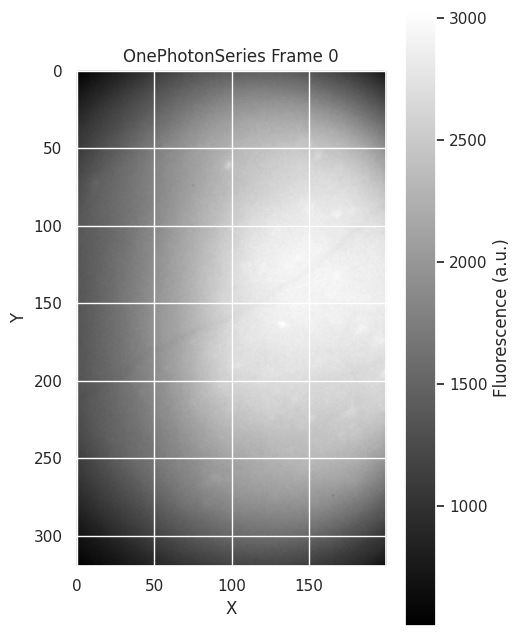

In [5]:
series = nwb.acquisition["OnePhotonSeries"]
frame0 = series.data[0, :, :]  # first frame

plt.figure(figsize=(5, 8))
plt.imshow(frame0, cmap="gray")
plt.title("OnePhotonSeries Frame 0")
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar(label="Fluorescence (a.u.)")
plt.show()

## Explore ROI segmentation (cell masks)

The PlaneSegmentation table contains image masks for each cell (ROI).  
Let's look at all cell masks superimposed as a heatmap, and display a few example masks individually.

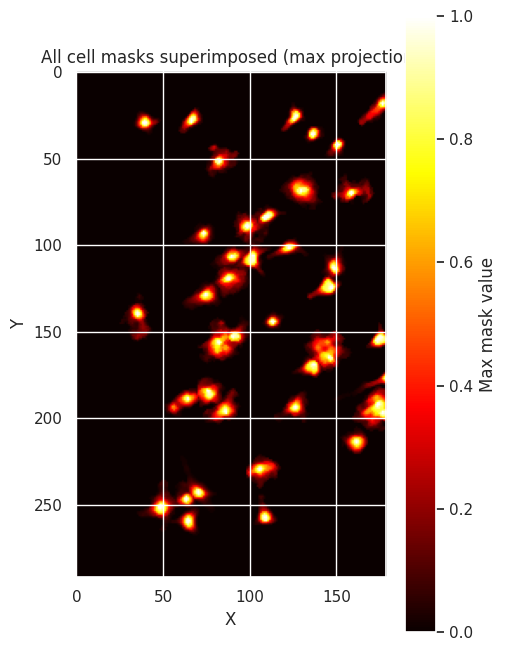

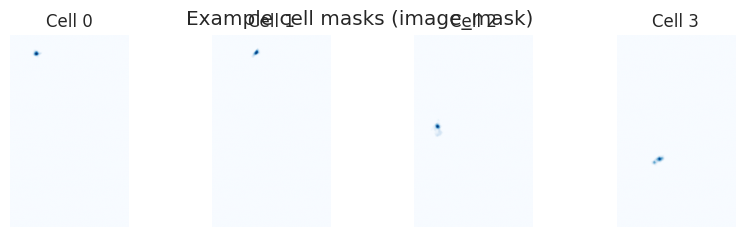

In [6]:
plane_segmentation = (nwb.processing["ophys"].data_interfaces["ImageSegmentation"]
                     .plane_segmentations["PlaneSegmentation"])
roi_df = plane_segmentation.to_dataframe()  # shape: (40, 1) with 'image_mask'

# Stack all image masks to show density map
masks_arr = np.stack(roi_df["image_mask"].to_numpy())  # shape: (n_cells, H, W)
heatmap = np.max(masks_arr, axis=0)

plt.figure(figsize=(5, 8))
plt.imshow(heatmap, cmap="hot")
plt.title("All cell masks superimposed (max projection)")
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar(label="Max mask value")
plt.show()

# Plot a few example cell masks
n_plot = min(4, masks_arr.shape[0])
plt.figure(figsize=(10, 2.5))
for i in range(n_plot):
    plt.subplot(1, n_plot, i+1)
    plt.imshow(masks_arr[i], cmap="Blues")
    plt.title(f"Cell {roi_df.index[i]}")
    plt.axis("off")
plt.suptitle("Example cell masks (image_mask)")
plt.show()

## Extract and plot fluorescence traces from individual cells

The table ROI indices correspond to actual cell IDs in the PlaneSegmentation table.
Let's plot raw fluorescence traces for the first few cells.

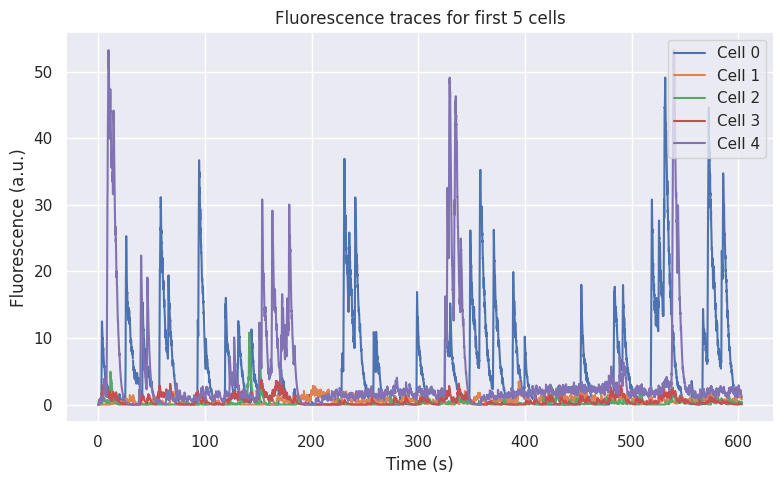

In [7]:
fluorescence = nwb.processing["ophys"].data_interfaces["Fluorescence"]
rrs = fluorescence.roi_response_series["RoiResponseSeries"]

trace_data = rrs.data[:, :5]  # shape: (6041, 5) for the first 5 cells
timepoints = np.arange(trace_data.shape[0]) / rrs.rate  # in seconds

plt.figure(figsize=(8, 5))
for i in range(trace_data.shape[1]):
    plt.plot(timepoints, trace_data[:, i], label=f"Cell {i}")
plt.xlabel("Time (s)")
plt.ylabel("Fluorescence (a.u.)")
plt.title("Fluorescence traces for first 5 cells")
plt.legend()
plt.tight_layout()
plt.show()

## View event amplitude traces

Let's visualize the event amplitude time series for a subset of cells.

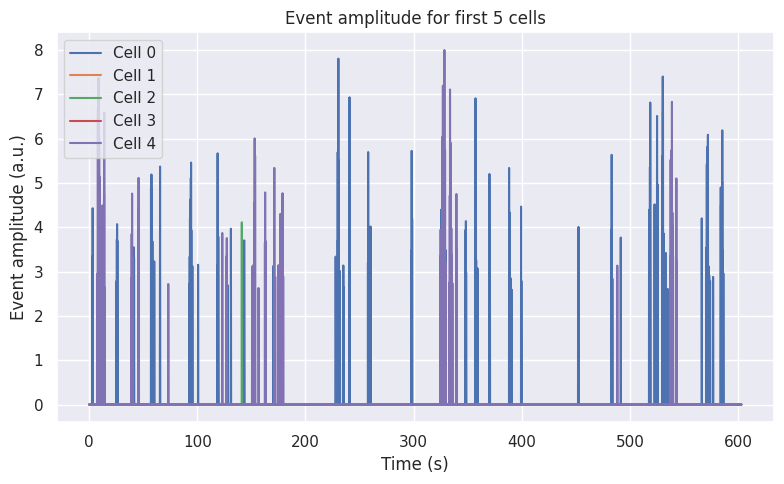

In [8]:
event_amp = nwb.processing["ophys"].data_interfaces["EventAmplitude"]
event_data = event_amp.data[:, :5]  # shape: (6041, 5)
event_time = np.arange(event_data.shape[0]) / event_amp.rate

plt.figure(figsize=(8, 5))
for i in range(event_data.shape[1]):
    plt.plot(event_time, event_data[:, i], label=f"Cell {i}")
plt.xlabel("Time (s)")
plt.ylabel("Event amplitude (a.u.)")
plt.title("Event amplitude for first 5 cells")
plt.legend()
plt.tight_layout()
plt.show()

## Summary and future directions

In this notebook, we've demonstrated how to:
- Access Dandiset 001174 and its metadata
- Load a remote NWB file using PyNWB, h5py, and remfile
- Visualize a sample calcium imaging frame
- Examine and plot ROI (cell) segmentation masks
- Extract and visualize cell-wise fluorescence and event amplitude traces

**What next?**

- Analyze temporal relationships or synchrony between ROIs
- Explore other NWB files or sessions within the Dandiset
- Investigate the effects of particular behavioral epochs (not covered here)
- Apply more advanced statistical or visualization techniques

For further interactive exploration, try this file with [Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/&dandisetId=001174&dandisetVersion=draft).

End of notebook